# Homework Problem 1: Atmospherice CO2 and Global Temperature: Polynomial Fitting and Error Propagation Analysis

## **Objective**
Apply least squares theory to fit polynomial models of increasing complexity to real climate data, compute model parameter uncertainties using linear error propagation, and analyze the trade-off between model complexity and fitting quality.

---

## **Problem Setup**
You have successfully downloaded two important climate time series:
1. **Atmospheric CO₂ concentrations** (ppm) from NOAA Mauna Loa Observatory  
2. **Global temperature anomalies** (°C) from NASA GISS

Your task is to perform a systematic analysis of polynomial fitting to these datasets.

---

## **Part A: Data Preparation and Uncertainty Assignment**

### **A1. Data Examination**
First, run all the existing cells above to download and visualize both datasets. Examine the time series plots carefully.

### **A2. Uncertainty Assignment** 
Since the original datasets don't include measurement uncertainties, you must assign reasonable values by visual inspection:

- **CO₂ Data**: Examine the scatter around the smooth trend in the CO₂ time series. Assign a uniform standard deviation `σ_CO2` that represents typical measurement/natural variability.

- **Temperature Data**: Look at the variability in the temperature anomaly time series. Assign a uniform standard deviation `σ_temp` based on the typical scatter around longer-term trends.

**Guidelines**: 
- For CO₂: Consider values between 0.1-2.0 ppm
- For Temperature: Consider values between 0.05-0.3 °C
- Justify your choices based on visual inspection of the data

---

## **Part B: Polynomial Fitting Analysis**

### **B1. Systematic Polynomial Fitting**
For **both datasets separately**, perform least squares fits for polynomial models of increasing order:

- **Order 0**: $y = a_0$ (horizontal line)
- **Order 1**: $y = a_0 + a_1 t$ (linear trend)  
- **Order 2**: $y = a_0 + a_1 t + a_2 t^2$ (quadratic)
- **Order 3**: $y = a_0 + a_1 t + a_2 t^2 + a_3 t^3$ (cubic)
- **Order 4**: $y = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4$ (quartic)

Where $t$ represents time (use decimal years or years since a reference date).

### **B2. Implementation Requirements**
For each polynomial order, you must:

1. **Build the design matrix** $\mathbf{G}$ properly
2. **Solve using normal equations**: $\mathbf{m} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d}$
3. **Compute parameter covariance matrix**: $\mathbf{C}_m = \sigma^2 (\mathbf{G}^T \mathbf{G})^{-1}$
4. **Calculate parameter uncertainties**: $\sigma_{a_i} = \sqrt{[\mathbf{C}_m]_{ii}}$
5. **Compute model statistics**: $\chi^2$ values, p-values



---

## **Part C: Model Selection and Analysis**

### **C1. Model Comparison**
Create a summary table showing:
- Polynomial order
- Number of parameters  
- $\chi^2$ value
- F-statistic and critical F-value at the $\alpha=0.05$ level
- Condition number of $\mathbf{G}^T\mathbf{G}$


### **C2. Visualization**
Create plots showing:
- Data with fitted polynomials (multiple orders on same plot)
- Parameter uncertainties vs polynomial order
- Residuals analysis for your "best" model choice
- Prediction uncertainty bands (for at least one model)



---

## **Deliverables**

1. **Code cells** implementing the polynomial fitting for both datasets
2. **Results tables** with parameter estimates and uncertainties  
3. **Plots** showing fits, residuals, and uncertainty analysis
4. **Written discussion** (markdown cells) addressing the physical interpretation and model selection questions




# Atmospheric CO2 and Global Temperature Data Analysis

This notebook downloads and analyzes two important climate time series:
1. **Atmospheric CO2 concentrations** from NOAA Mauna Loa Observatory
2. **Global average temperature anomalies** from NASA GISS

We'll download the data directly from official sources, process it, and create visualizations to explore potential relationships between these variables.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import io
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Download Atmospheric CO2 data from NOAA Mauna Loa Observatory
print("Downloading CO2 data from NOAA Mauna Loa Observatory...")

co2_url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

try:
    # Download the data
    with urllib.request.urlopen(co2_url) as response:
        data = response.read().decode('utf-8')
    
    # Parse the data (skip comment lines starting with #)
    lines = [line for line in data.split('\n') if not line.startswith('#') and line.strip()]
    
    # Parse data into lists
    co2_data = []
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.split()
            if len(parts) >= 4:
                year = int(parts[0])
                month = int(parts[1])
                decimal_date = float(parts[2])
                co2_avg = float(parts[3])
                
                # Skip missing data (marked as -99.99)
                if co2_avg > 0:
                    co2_data.append({
                        'year': year,
                        'month': month,
                        'decimal_date': decimal_date,
                        'co2_ppm': co2_avg
                    })
    
    # Convert to DataFrame
    co2_df = pd.DataFrame(co2_data)
    co2_df['date'] = pd.to_datetime(co2_df[['year', 'month']].assign(day=1))
    
    print(f"Successfully downloaded CO2 data!")
    print(f"Data range: {co2_df['year'].min()} - {co2_df['year'].max()}")
    print(f"Number of records: {len(co2_df)}")
    print(f"CO2 range: {co2_df['co2_ppm'].min():.1f} - {co2_df['co2_ppm'].max():.1f} ppm")
    
    # Display first few rows
    print("\nFirst 5 records:")
    print(co2_df.head())

except Exception as e:
    print(f"Error downloading CO2 data: {e}")
    print("You may need to check your internet connection or try again later.")

Successfully downloaded CO2 data!
Data range: 1958 - 2025
Number of records: 810
CO2 range: 312.4 - 430.5 ppm

First 5 records:
   year  month  decimal_date  co2_ppm       date
0  1958      3     1958.2027   315.71 1958-03-01
1  1958      4     1958.2877   317.45 1958-04-01
2  1958      5     1958.3699   317.51 1958-05-01
3  1958      6     1958.4548   317.27 1958-06-01
4  1958      7     1958.5370   315.87 1958-07-01


In [3]:
# Download Global Temperature data from NASA GISS
print("Downloading global temperature data from NASA GISS...")

temp_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt"

try:
    # Try with different SSL context to handle SSL issues
    import ssl
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE
    
    # Download the data with SSL context
    request = urllib.request.Request(temp_url)
    with urllib.request.urlopen(request, context=ssl_context) as response:
        data = response.read().decode('utf-8')
    
    # Parse the NASA GISS temperature data
    lines = data.split('\n')
    
    # Find the start of data (after header lines)
    data_start = 0
    for i, line in enumerate(lines):
        if 'Year' in line and 'Jan' in line:
            data_start = i + 1
            break
    
    # Parse temperature data
    temp_data = []
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for line in lines[data_start:]:
        if line.strip() and not line.startswith('Year'):
            parts = line.split()
            if len(parts) >= 13 and parts[0].isdigit():
                year = int(parts[0])
                
                # Process monthly data (skip annual averages)
                for month_idx, temp_str in enumerate(parts[1:13]):
                    if temp_str != '***':  # Skip missing data
                        try:
                            temp_anomaly = float(temp_str) / 100.0  # Convert to degrees C
                            temp_data.append({
                                'year': year,
                                'month': month_idx + 1,
                                'month_name': months[month_idx],
                                'temp_anomaly': temp_anomaly
                            })
                        except ValueError:
                            continue
    
    # Convert to DataFrame
    temp_df = pd.DataFrame(temp_data)
    temp_df['date'] = pd.to_datetime(temp_df[['year', 'month']].assign(day=1))
    
    print(f"Successfully downloaded temperature data!")
    print(f"Data range: {temp_df['year'].min()} - {temp_df['year'].max()}")
    print(f"Number of records: {len(temp_df)}")
    print(f"Temperature anomaly range: {temp_df['temp_anomaly'].min():.2f} - {temp_df['temp_anomaly'].max():.2f} °C")
    
    # Display first few rows
    print("\nFirst 5 records:")
    print(temp_df.head())

except Exception as e:
    print(f"Error downloading from NASA GISS: {e}")
    print("Loading temperature data from local file 'NASA_global_temp_data.txt'...")
    
    # Load from local file if download fails
    temp_df = pd.read_csv('NASA_global_temp_data.txt', delim_whitespace=True)
    # If the file has columns 'Year', 'Month', 'TempAnomaly', convert as needed
    if 'Year' in temp_df.columns and 'Month' in temp_df.columns:
        temp_df['date'] = pd.to_datetime(temp_df[['Year', 'Month']].assign(day=1))
        temp_df.rename(columns={'TempAnomaly': 'temp_anomaly'}, inplace=True)
    print(f"Loaded {len(temp_df)} records from NASA_global_temp_data.txt")

Successfully downloaded temperature data!
Data range: 1880 - 2025
Number of records: 1748
Temperature anomaly range: -0.82 - 1.48 °C

First 5 records:
   year  month month_name  temp_anomaly       date
0  1880      1        Jan         -0.19 1880-01-01
1  1880      2        Feb         -0.25 1880-02-01
2  1880      3        Mar         -0.09 1880-03-01
3  1880      4        Apr         -0.16 1880-04-01
4  1880      5        May         -0.10 1880-05-01


Common data period: 1958-03 to 2025-08
Number of common data points: 810


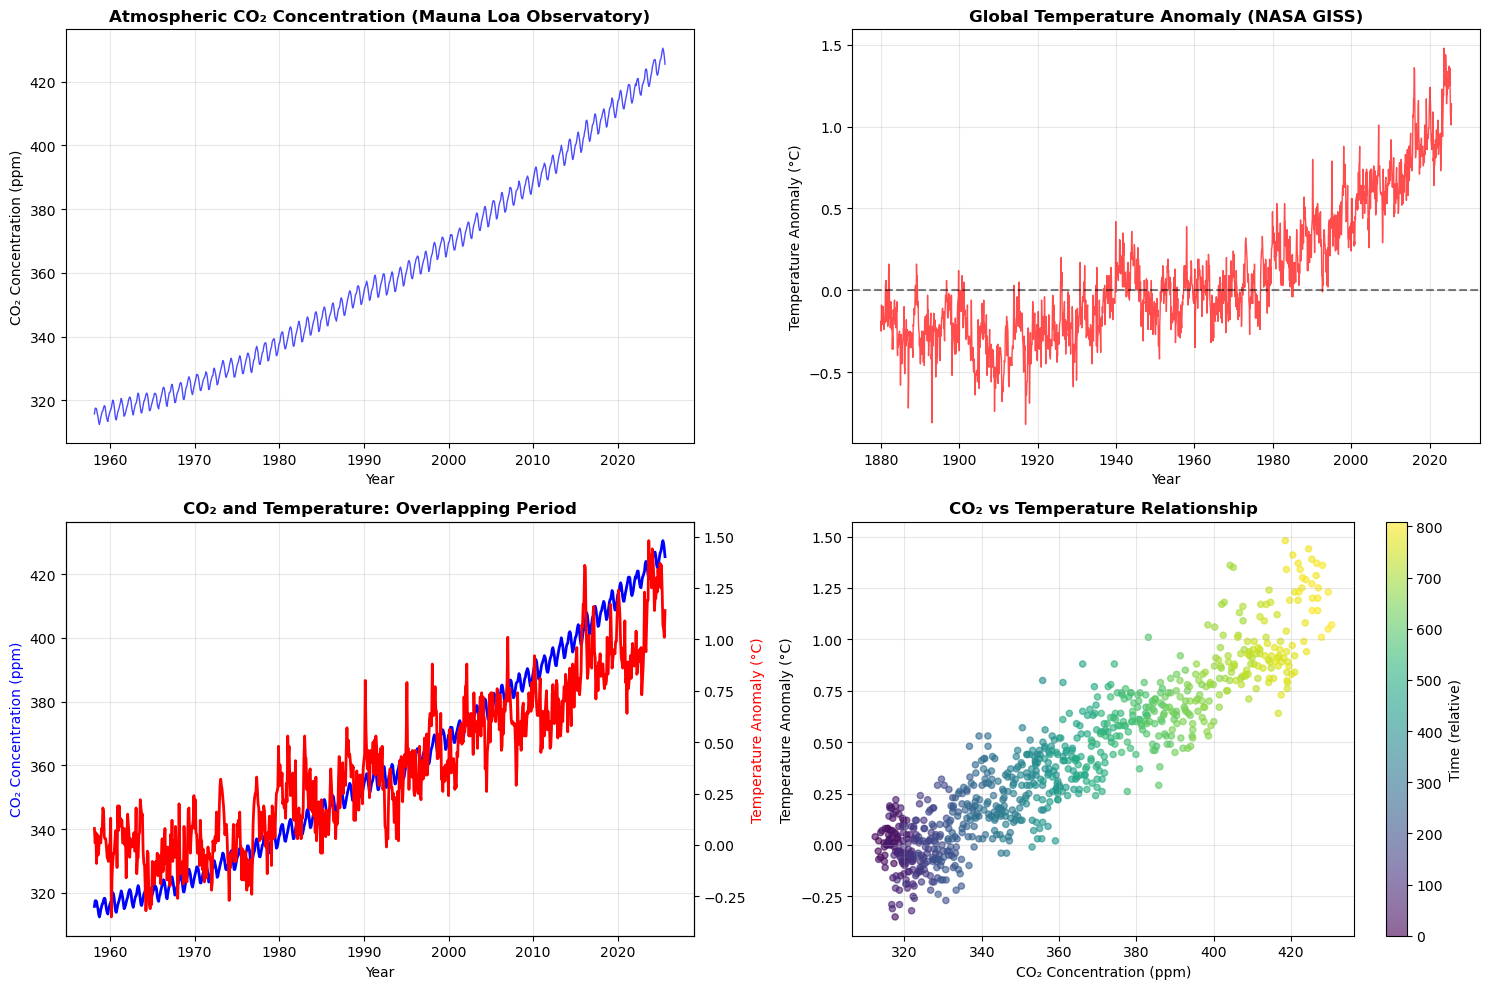


Correlation coefficient between CO₂ and temperature: 0.926


In [4]:
# Plot both time series
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot CO2 time series
ax1.plot(co2_df['date'], co2_df['co2_ppm'], 'b-', linewidth=1, alpha=0.7)
ax1.set_title('Atmospheric CO₂ Concentration (Mauna Loa Observatory)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO₂ Concentration (ppm)')
ax1.grid(True, alpha=0.3)

# Plot temperature time series
ax2.plot(temp_df['date'], temp_df['temp_anomaly'], 'r-', linewidth=1, alpha=0.7)
ax2.set_title('Global Temperature Anomaly (NASA GISS)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature Anomaly (°C)')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Find overlapping time period for comparison
# Merge datasets on common dates
common_data = pd.merge(co2_df[['date', 'co2_ppm']], 
                      temp_df[['date', 'temp_anomaly']], 
                      on='date', how='inner')

print(f"Common data period: {common_data['date'].min().strftime('%Y-%m')} to {common_data['date'].max().strftime('%Y-%m')}")
print(f"Number of common data points: {len(common_data)}")

# Plot overlapping period
ax3.plot(common_data['date'], common_data['co2_ppm'], 'b-', linewidth=2, label='CO₂ (ppm)')
ax3_twin = ax3.twinx()
ax3_twin.plot(common_data['date'], common_data['temp_anomaly'], 'r-', linewidth=2, label='Temp Anomaly (°C)')
ax3.set_title('CO₂ and Temperature: Overlapping Period', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('CO₂ Concentration (ppm)', color='blue')
ax3_twin.set_ylabel('Temperature Anomaly (°C)', color='red')
ax3.grid(True, alpha=0.3)

# Scatter plot to show relationship
ax4.scatter(common_data['co2_ppm'], common_data['temp_anomaly'], 
           alpha=0.6, s=20, c=range(len(common_data)), cmap='viridis')
ax4.set_title('CO₂ vs Temperature Relationship', fontsize=12, fontweight='bold')
ax4.set_xlabel('CO₂ Concentration (ppm)')
ax4.set_ylabel('Temperature Anomaly (°C)')
ax4.grid(True, alpha=0.3)

# Add colorbar to show time evolution
cbar = plt.colorbar(ax4.collections[0], ax=ax4)
cbar.set_label('Time (relative)')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = common_data['co2_ppm'].corr(common_data['temp_anomaly'])
print(f"\nCorrelation coefficient between CO₂ and temperature: {correlation:.3f}")

CO2 data array shape: (810,)
CO2 data range: 312.42 to 430.51 ppm
Estimated coefficients: [-2.97472500e+05  4.72157715e+02 -2.49702454e-01  4.40420699e-05]


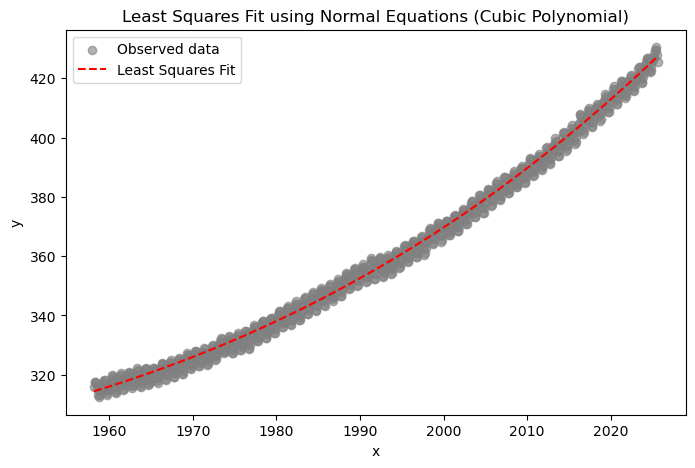

In [ ]:
##polynomial fit using normal equations for CO2 dat set 

# Convert CO2 data to numpy arrays for analysis

# Extract CO2 concentration values as numpy array
co2_data = co2_df['co2_ppm'].values
print(f"CO2 data array shape: {co2_data.shape}")
print(f"CO2 data range: {co2_data.min():.2f} to {co2_data.max():.2f} ppm")

# Convert dates to decimal years
# Method 1: Using the decimal_date column if available
if 'decimal_date' in co2_df.columns:
    co2_years = co2_df['decimal_date'].values
else:
    # Method 2: Convert datetime to decimal years
    # Get year and day of year for each date
    co2_years = np.array([
        date.year + (date.dayofyear - 1) / 365.25 
        for date in co2_df['date']
    ])

## Build G matrix for 3rd order polynomial fit

G = np.vstack([np.ones_like(co2_years), co2_years, co2_years**2, co2_years**3]).T

# Solve normal equations: m = (G^T G)^(-1) G^T d
GTG = G.T @ G
GTd = G.T @ co2_data
m_est = np.linalg.inv(GTG) @ GTd


# Predicted data
y_pred = G @ m_est

# Print estimated coefficients
print("Estimated coefficients:", m_est)


# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(co2_years, co2_data, label='Observed data', color='gray', alpha=0.6)
plt.plot(co2_years, y_pred, label='Least Squares Fit', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit using Normal Equations (Cubic Polynomial)')
plt.show()


### Interpretation
- Discuss how parameter uncertainties change with polynomial order
- Which polynomial order seems most appropriate for each dataset?
- What do the polynomial coefficients tell you about climate trends?
- How do the CO₂ and temperature trends compare?
- Discuss any overfitting concerns with higher-order polynomials

Answer here

# Homework Problem 2: Earthquake Slip Inversion Using Screw Dislocation Model

## **Objective**
Apply least squares inversion techniques to determine the slip distribution on a vertical fault using surface displacement data from the Denali earthquake. Explore the effects of model parameterization and regularization on the solution quality and stability.

---

## **Background**
Earthquake slip inversions are fundamental to understanding fault mechanics and seismic hazards. Given surface displacement measurements, we can invert for the distribution of slip on a fault plane using elastic dislocation theory. The **screw dislocation model** provides the forward relationship between fault slip and surface displacement.

### **Forward Model: Screw Dislocation**
For a vertical fault with strike-slip motion, the horizontal displacement $u(x)$ at surface position $x$ due to slip $s_i$ on fault patch $i$ at depth $d_i$ is given by:

$$u(x) = \sum_{i=1}^{N} G_{xi} \cdot s_i$$

where $G_{xi}$ is the Green's function (sensitivity kernel) relating slip on patch $i$ to displacement at position $x$.

For a screw dislocation, the Green's function for a fault patch extending from depth $d_1$ to $d_2$ is:
$$G_{xi} = \frac{s}{\pi} \left[ \arctan\left(\frac{x}{d_1}\right) - \arctan\left(\frac{x}{d_2}\right) \right]$$

where $s$ is the unit slip, $x$ is the horizontal distance from the fault trace, $d_1$ is the top depth of the patch, and $d_2$ is the bottom depth of the patch.

---

## **Problem Setup**
You will work with displacement data from the **Denali earthquake** stored in `DenaliEarthquakeData.txt`. This file contains:
- Column 1: Distance from fault (km)  
- Column 2: Horizontal displacement (m)
- Column 3: Measurement uncertainty (m)

The fault extends vertically from the surface to 20 km depth and will be discretized into patches of equal thickness.

---

## **Part A: Unregularized Inversion Analysis**

### **A1. Model Setup**
For each number of patches $N = 1, 2, 3, \ldots, 10$:

1. **Discretize the fault** into $N$ patches from surface to 20 km depth
   - Patch $i$ extends from depth $(i-1) \times \frac{20}{N}$ km to $i \times \frac{20}{N}$ km
   - Use the center depth of each patch for the Green's function calculation

2. **Build the design matrix** $\mathbf{G}$ where $G_{ji}$ relates slip on patch $i$ to displacement at observation point $j$

3. **Solve the weighted least squares problem**:
   $$\mathbf{m} = (\mathbf{G}^T \mathbf{W} \mathbf{G})^{-1} \mathbf{G}^T \mathbf{W} \mathbf{d}$$
   where $\mathbf{W} = \text{diag}(1/\sigma_j^2)$ is the data weight matrix

### **A2. Analysis Requirements**
For each value of $N$, compute and tabulate:
- **Model parameters**: Slip values for each patch
- **Data fit**: RMS misfit, $\chi^2$ value
- **Model properties**: Total moment, maximum slip
- **Matrix condition**: Condition number of $\mathbf{G}^T \mathbf{W} \mathbf{G}$

### **A3. Discussion Questions**
- How does the data fit improve with increasing $N$?
- What happens to the slip distribution as $N$ increases?
- Do you observe any unrealistic features in the solutions?
- How does the condition number change with $N$? What does this tell you?

---

## **Part B: Regularized Inversion**

The unregularized solutions likely become unstable or unrealistic for large $N$. Apply two types of regularization to stabilize the inversion:

### **B1. Minimum Length Regularization (Ridge Regression)**
Minimize the objective function:
$$S(\mathbf{m}) = ||\mathbf{d} - \mathbf{G}\mathbf{m}||^2_W + \alpha ||\mathbf{m}||^2$$

**Solution**:
$$\mathbf{m}_{\text{ridge}} = (\mathbf{G}^T \mathbf{W} \mathbf{G} + \alpha \mathbf{I})^{-1} \mathbf{G}^T \mathbf{W} \mathbf{d}$$

where $\alpha$ is the regularization parameter.

### **B2. First Derivative Smoothing**
Minimize the objective function:
$$S(\mathbf{m}) = ||\mathbf{d} - \mathbf{G}\mathbf{m}||^2_W + \beta ||\mathbf{L}\mathbf{m}||^2$$

where $\mathbf{L}$ is the first-difference operator matrix that approximates $\frac{dm}{dz}$.

**Solution**:
$$\mathbf{m}_{\text{smooth}} = (\mathbf{G}^T \mathbf{W} \mathbf{G} + \beta \mathbf{L}^T \mathbf{L})^{-1} \mathbf{G}^T \mathbf{W} \mathbf{d}$$

### **B3. Regularization Parameter Selection**
For both regularization methods:
1. **Test different values** of $\alpha$ and $\beta$ (e.g., $10^{-6}$ to $10^{2}$)
2. **Plot L-curves**: RMS data misfit vs. regularization norm
3. **Choose optimal parameters** using the L-curve corner 

### **B4. Implementation Details**
- **First-difference matrix $\mathbf{L}$**: For $N$ patches, $\mathbf{L}$ is $(N-1) \times N$:
  ```
  L = [[-1,  1,  0,  0, ...],
       [ 0, -1,  1,  0, ...],
       [ 0,  0, -1,  1, ...],
       [...]]
  ```

---

## **Part C: Results and Interpretation**

### **C1. Comparative Analysis**
Create visualizations showing:
1. **Slip distributions** for different $N$ (unregularized vs. regularized)
2. **Data fits** comparing observed and predicted displacements  
3. **Trade-off curves (L-curves)** showing data misfit vs. model roughness/norm



In [ ]:
#Python code here

Explanation goes here

